In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [197]:
train_static_well_dat=pd.read_csv('./ANTICLINE-main/wellbore_data_preproduction_well.csv')
test_static_well_dat=pd.read_csv('./ANTICLINE-main/wellbore_data_producer_wells.csv')

In [198]:
static_well_dat=pd.concat([train_static_well_dat,test_static_well_dat])

In [199]:
# add layer as a feature
static_well_dat['layer']=np.arange(static_well_dat.shape[0])%20

In [200]:
#Index(['Well_ID', 'X, m', 'Y, m', 'Depth, m', 'Porosity, fraction',
#       'Permeability, mD', 'Acoustic Impedance, kg*s/m^2', 'Rock facies',
#       'Density, g/cm3', 'Compressible velocity, m/s', 'Youngs modulus, GPa',
 #      'Shear velocity, m/s', 'Shear modulus, GPa', 'layer', 'lith_id'],
#      dtype='object')

In [201]:
# import 2d map data
s_map=np.load('./ANTICLINE-main/2d_sand_propotion.npy')
s_sh_map=np.load('./ANTICLINE-main/2d_sandy_shale_propotion.npy')
sh_s_map=np.load('./ANTICLINE-main/2d_shaly_sand_propotion.npy')
sh_map=np.load('./ANTICLINE-main/2d_shale_propotion.npy')
top_map=np.load('./ANTICLINE-main/2d_top_depth.npy')
ai_map=np.load('./ANTICLINE-main/2d_ai.npy')

In [202]:
prod_data=pd.read_csv('./ANTICLINE-main/production_history.csv')

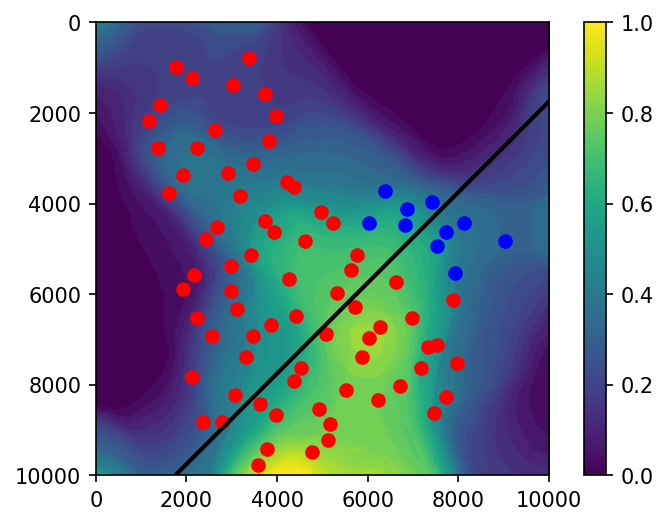

In [299]:
well_train_loc=train_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]
well_test_loc=test_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]



plt.figure(dpi=150)
plt.imshow((s_map),extent=[0,10000,10000,0])#top_map
plt.scatter(well_train_loc[:,1],well_train_loc[:,2],color='blue')
plt.scatter(well_test_loc[:,1],well_test_loc[:,2],color='red')

x = np.linspace(0,10000, 50)
fault = -x + 11750
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.ylim([10000,0])
plt.colorbar()

In [204]:
#calculate distance to the fault
x0y0=np.array([0,11750])
dxdy=well_test_loc[:,1:]-x0y0

In [205]:
dist=((dxdy[:,0]+dxdy[:,1])/np.sqrt(2)).astype(float)

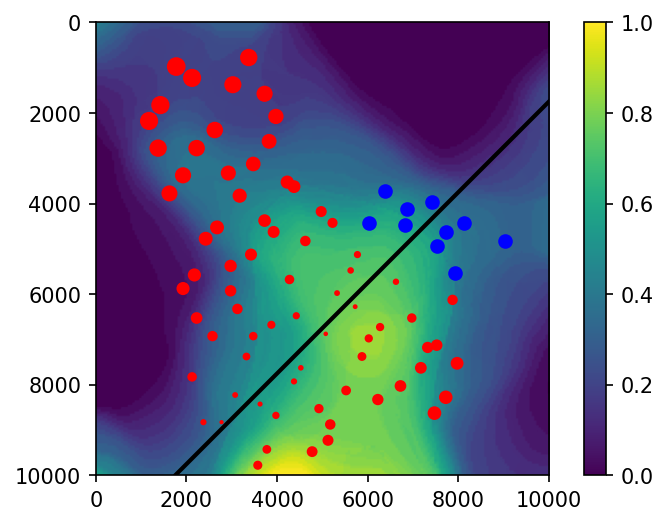

In [206]:
well_train_loc=train_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]
well_test_loc=test_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]



plt.figure(dpi=150)
plt.imshow((s_map),extent=[0,10000,10000,0])#top_map
plt.scatter(well_train_loc[:,1],well_train_loc[:,2],color='blue')
plt.scatter(well_test_loc[:,1],well_test_loc[:,2],s=np.abs(dist)/100,color='red')

x = np.linspace(0,10000, 50)
fault = -x + 11750
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.ylim([10000,0])
plt.colorbar()

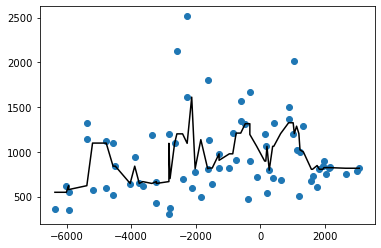

In [207]:

plt.scatter(dist,prod_data['Cumulative oil production (3 yr), MSTB'].values)
sort_dist=np.argsort(dist)
sort_prod=np.argsort(prod_data['Cumulative oil production (3 yr), MSTB'].values)
dist=dist[sort_dist]
prod=prod_data['Cumulative oil production (3 yr), MSTB'].values[sort_dist]
plt.plot(dist,median_filter(prod,8),color='black')

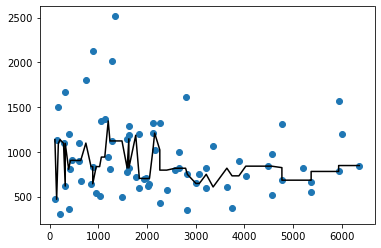

In [208]:
from scipy.ndimage import median_filter
dist=np.abs(dist)
plt.scatter(dist,prod_data['Cumulative oil production (3 yr), MSTB'].values)

sort_dist=np.argsort(dist)
sort_prod=np.argsort(prod_data['Cumulative oil production (3 yr), MSTB'].values)
dist=dist[sort_dist]
prod=prod_data['Cumulative oil production (3 yr), MSTB'].values[sort_dist]
plt.plot(dist,median_filter(prod,5),color='black')

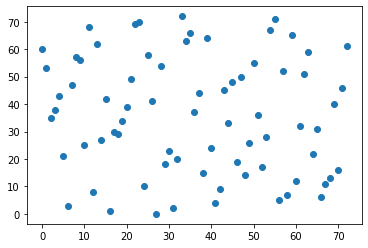

In [209]:
# rank correlation
plt.scatter(sort_dist,sort_prod)

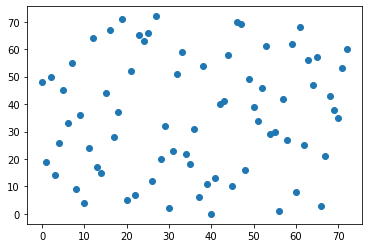

In [210]:
sort_dist=np.argsort(np.abs(dist))
plt.scatter(sort_dist,sort_prod)

In [211]:
#along the fault
x0y0=np.array([0,10000])
dxdy=well_test_loc[:,1:]-x0y0
dist2=((dxdy[:,0]-dxdy[:,1])/np.sqrt(2)).astype(float)

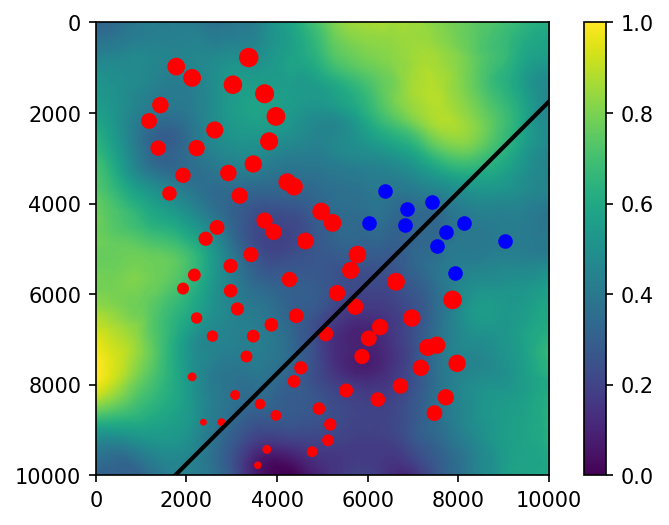

In [212]:
well_train_loc=train_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]
well_test_loc=test_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]



plt.figure(dpi=150)
plt.imshow((ai_map),extent=[0,10000,10000,0])#top_map
plt.scatter(well_train_loc[:,1],well_train_loc[:,2],color='blue')
plt.scatter(well_test_loc[:,1],well_test_loc[:,2],s=np.abs(dist2-2000)/100,color='red')

x = np.linspace(0,10000, 50)
fault = -x + 11750
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.ylim([10000,0])
plt.colorbar()

In [213]:
prod=prod_data[['Cumulative oil production (3 yr), MSTB','Cumulative Water production (3 yr), MSTB']].values

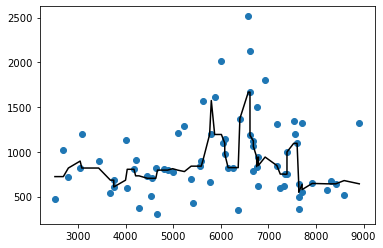

In [214]:
from scipy.ndimage import median_filter
dist=np.abs(dist2)
plt.scatter(dist2,prod_data['Cumulative oil production (3 yr), MSTB'].values)

sort_dist=np.argsort(dist2)
sort_prod=np.argsort(prod_data['Cumulative oil production (3 yr), MSTB'].values)

prod=prod_data['Cumulative oil production (3 yr), MSTB'].values
plt.plot(dist[sort_dist],median_filter(prod[sort_dist],5),color='black')

In [215]:
sort_dist=np.argsort(dist2)
sort_prod=np.argsort(prod_data['Cumulative oil production (3 yr), MSTB'].values)

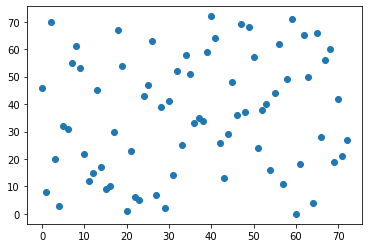

In [216]:
# rank correlation
plt.scatter(sort_dist,sort_prod)

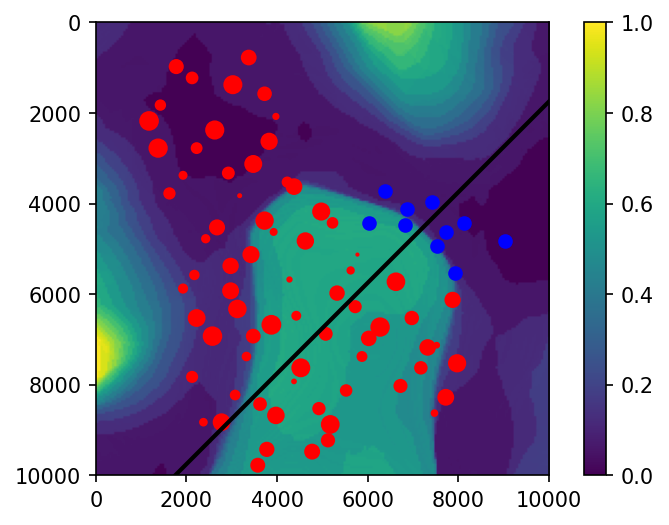

In [358]:
# check spatial continuity of production data
prod=np.argsort(prod_data['Cumulative oil production (3 yr), MSTB'].values)
well_train_loc=train_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]
well_test_loc=test_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]



plt.figure(dpi=150)
plt.imshow((s_sh_map),extent=[0,10000,10000,0])#top_map
plt.scatter(well_train_loc[:,1],well_train_loc[:,2],color='blue')
plt.scatter(well_test_loc[:,1],well_test_loc[:,2],s=prod,color='red')

x = np.linspace(0,10000, 50)
fault = -x + 11750
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.ylim([10000,0])
plt.colorbar()


In [218]:
litho_keys = {'Shale':0,
                     'Shaly sandstone':1,
                     'Sandy shale': 2,
                     'Sandstone': 3}
static_well_dat['lith_id'] = static_well_dat['Rock facies'].map(litho_keys)


In [219]:
N=np.unique(static_well_dat['Well_ID']).size
N_features=static_well_dat.shape[-1]

In [220]:
static_well_dat_per_well=(static_well_dat.values).reshape([N,-1,N_features])

In [221]:
lith=static_well_dat_per_well[:,:,-1]
lith=lith.astype(float)
myrange=7
N_lith=4
lith_variogram=np.zeros((N_lith-1,myrange))
bad=np.isnan(lith)
for trunc in range(N_lith-1):
    lith_ind=(lith<=trunc).astype(float)
    lith_ind[bad]=np.nan
    for i in np.arange(1,myrange):
        dif_lith=lith_ind[:,i:]-lith_ind[:,:-i]
        lith_variogram[trunc,i]=np.mean((dif_lith[np.isfinite(dif_lith)]**2/2).flatten())

Text(0, 0.5, 'Indicator Variogram')

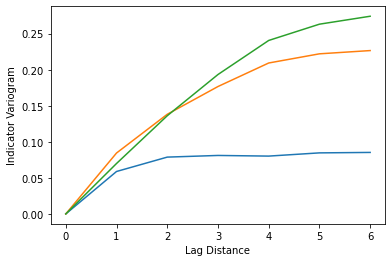

In [10]:
for i in range(N_lith-1):
    plt.plot(lith_variogram[i])
plt.xlabel('Lag Distance')
plt.ylabel('Indicator Variogram')

In [222]:
# cloud transform
static_well_dat.keys()

Index(['Well_ID', 'X, m', 'Y, m', 'Depth, m', 'Porosity, fraction',
       'Permeability, mD', 'Acoustic Impedance, kg*s/m^2', 'Rock facies',
       'Density, g/cm3', 'Compressible velocity, m/s', 'Youngs modulus, GPa',
       'Shear velocity, m/s', 'Shear modulus, GPa', 'layer', 'lith_id'],
      dtype='object')

In [223]:
static_well_dat['Permeability, mD']=np.log10(static_well_dat['Permeability, mD'])

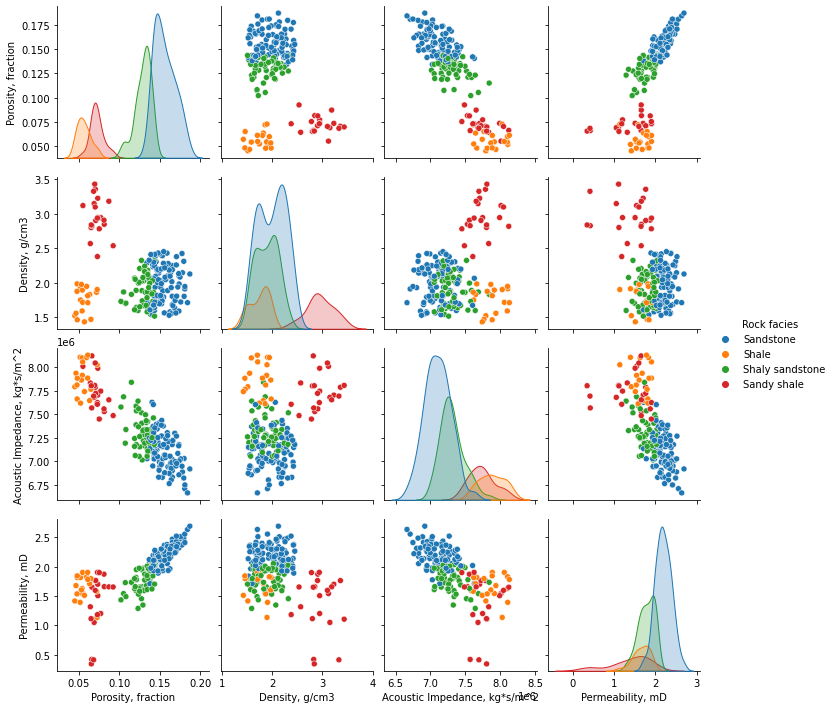

In [224]:
sns.pairplot(static_well_dat[['Porosity, fraction','Density, g/cm3','Rock facies','Acoustic Impedance, kg*s/m^2','Permeability, mD']].dropna(axis=0,how='any'), hue="Rock facies")


In [225]:
static_well_dat[['X''Porosity, fraction','Density, g/cm3','Rock facies']].dropna(axis=0,how='any')

,"Porosity, fraction","Density, g/cm3",Rock facies
1,0.09096,1.872982,Shaly sandstone
2,0.05878,3.187123,Sandy shale
4,0.12285,1.678339,Shaly sandstone
6,0.12519,1.977816,Shaly sandstone
8,0.13436,1.727151,Sandstone
...,...,...,...
1455,0.16289,2.092585,Sandstone
1456,0.15909,2.109057,Sandstone
1457,0.15692,1.620103,Sandstone
1458,0.15737,1.759469,Sandstone


In [226]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

train_dat=static_well_dat[['Porosity, fraction','Density, g/cm3','layer','lith_id']].values

imp_mean = IterativeImputer()
imp_mean.fit(train_dat)


IterativeImputer()

In [266]:
train_dat_transform=imp_mean.transform(train_dat)

In [267]:
train_dat_transform[:,-1][train_dat_transform[:,-1]<0]=0
train_dat_transform[:,-1][train_dat_transform[:,-1]>3]=3
train_dat_transform[:,-1]=np.round(train_dat_transform[:,-1])

In [262]:
train_dat_transform.shape

(1660, 4)

In [28]:
import tensorflow as tf
from tensorflow.keras import layers

In [269]:
#scale
train_dat_norm=(train_dat_transform-np.min(train_dat_transform,axis=0))/(np.max(train_dat_transform,axis=0)-np.min(train_dat_transform,axis=0))

In [270]:
train_dat_norm=train_dat_norm.reshape((-1,20,4))

In [276]:
sand_prop=np.sum((train_dat_norm[:,:,0]).astype(float),axis=-1)/20

In [277]:
train_dat_norm[:,:,-1]

array([[0.66666667, 0.33333333, 0.66666667, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.33333333, 0.33333333,
        0.33333333],
       [0.        , 0.        , 0.33333333, ..., 0.33333333, 0.        ,
        0.33333333],
       [0.        , 0.33333333, 0.33333333, ..., 1.        , 1.        ,
        0.        ]])

In [273]:
prod_data.head(3)

,Well_ID,"Cumulative oil production (1 yr), MSTB","Cumulative oil production (2 yr), MSTB","Cumulative oil production (3 yr), MSTB","Cumulative Water production (1 yr), MSTB","Cumulative Water production (2 yr), MSTB","Cumulative Water production (3 yr), MSTB"
0,Well_no_1,450.98,684.20,847.33,494.89,1236.40,2108.7
1,Well_no_2,594.43,946.61,1201.20,226.97,646.50,1187.7
2,Well_no_3,381.75,611.38,781.40,393.17,948.18,1603.1


In [274]:
train_y=prod_data['Cumulative oil production (3 yr), MSTB'].values
train_y=(train_y-train_y.min()*0.7)/(train_y.max()*1.3-train_y.min()*0.7)

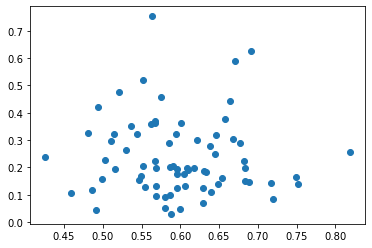

In [278]:
plt.scatter(sand_prop[:73],train_y)

In [60]:
aa=layers.Input(shape=(20,4))
bb=layers.Flatten()(aa)
bb=layers.Dense(16,activation='relu')(bb)
bb=layers.Dense(16,activation='relu')(bb)
output=layers.Dense(1,activation='sigmoid')(bb)
model=tf.keras.Model(aa,output)
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(lr=0.01))

In [62]:
model.fit(train_dat_norm[:73,],train_y,epochs=100)

Train on 73 samples
Epoch 1/100
73/73 [==============================] - 0s 246us/sample - loss: 0.0149
Epoch 2/100
73/73 [==============================] - 0s 205us/sample - loss: 0.0147
Epoch 3/100
73/73 [==============================] - 0s 191us/sample - loss: 0.0140
Epoch 4/100
73/73 [==============================] - 0s 178us/sample - loss: 0.0141
Epoch 5/100
73/73 [==============================] - 0s 232us/sample - loss: 0.0136
Epoch 6/100
73/73 [==============================] - 0s 164us/sample - loss: 0.0136
Epoch 7/100
73/73 [==============================] - 0s 205us/sample - loss: 0.0127
Epoch 8/100
73/73 [==============================] - 0s 164us/sample - loss: 0.0125
Epoch 9/100
73/73 [==============================] - 0s 246us/sample - loss: 0.0124
Epoch 10/100
73/73 [==============================] - 0s 150us/sample - loss: 0.0127
Epoch 11/100
73/73 [==============================] - 0s 205us/sample - loss: 0.0113
Epoch 12/100
73/73 [==============================] - 

In [63]:
test_y=model.predict(train_dat_norm[73:,])

In [64]:
test_y#oil 3 year cumulative production forecast

array([[0.12528157],
       [0.1742774 ],
       [0.4066364 ],
       [0.15874493],
       [0.2882115 ],
       [0.12342048],
       [0.2848616 ],
       [0.07969328],
       [0.12085125],
       [0.3159287 ]], dtype=float32)

In [ ]:
#CNN workflow

In [305]:
#assign properties to grid
map_prop=np.zeros((200,200,5))
well_prop=train_dat_norm[:,:,[0,-1]]

In [320]:
#well location map
well_loc=np.zeros((200,200))
X=well_test_loc[:,1].astype(float).copy()
Y=well_test_loc[:,2].astype(float).copy()
X=np.round((X-250)/50).astype(int)
Y=np.round((Y-250)/50).astype(int)
well_loc[X,Y]=1

In [332]:
map_prop=np.stack([s_map,s_sh_map,sh_s_map,sh_map,(top_map-top_map.min())/(top_map.max()-top_map.min()),(ai_map-ai_map.min())/(ai_map.max()-ai_map.min()),well_loc],axis=-1)

In [359]:
window=5
# extract patch
train_data1=[]
train_data2=[]
for i in range(73):
    if X[i]>window and X[i]<200-window-1 and Y[i]>window and Y[i]<200-window-1:
        map_patch=map_prop[X[i]-window:X[i]+window+1,Y[i]-window:Y[i]+window+1]
        train_data1.append(well_prop[i])
        train_data2.append(map_patch.copy())
train_data1=np.array(train_data1)
train_data2=np.array(train_data2)

In [349]:
from sklearn.model_selection import KFold

In [350]:
def get_model():
    aa=layers.Input(shape=(20,2))
    bb=layers.Flatten()(aa)
    bb=layers.Dense(16,activation='relu')(bb)


    map_input=layers.Input(shape=(11,11,7))
    map2=layers.Conv2D(14, kernel_size=5, strides=2, padding='same',activation='relu')(map_input)
    map2=layers.Conv2D(7, kernel_size=5, strides=2, padding='same',activation='relu')(map2)
    map3=layers.Flatten()(map2)
    map4=layers.Dense(16,activation='relu')(map3)

    dd=layers.Concatenate()([bb,map4])

    output=layers.Dense(1,activation='sigmoid')(dd)
    model=tf.keras.Model([aa,map_input],output)
    return model
    

In [362]:
kf = KFold(n_splits=8,shuffle=True)
train_y
error=[]
test=[]
pred=[]
for train_index, test_index in kf.split(X):
    mymodel=get_model()
    mymodel.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(lr=0.01))
    mymodel.fit([train_data1[train_index],train_data2[train_index]],train_y[train_index],validation_data=([train_data1[test_index],train_data2[test_index]],train_y[test_index]),epochs=20)
    mypred=mymodel.predict([train_data1[test_index],train_data2[test_index]])
    error.append(np.mean((train_y[test_index]-mypred)**2))
    test.append(train_y[test_index].copy())
    pred.append(mypred.copy())
   

Train on 63 samples, validate on 10 samples
Epoch 1/20
63/63 [==============================] - 10s 159ms/sample - loss: 0.0610 - val_loss: 0.0056
Epoch 2/20
63/63 [==============================] - 0s 364us/sample - loss: 0.0190 - val_loss: 0.0069
Epoch 3/20
63/63 [==============================] - 0s 380us/sample - loss: 0.0176 - val_loss: 0.0091
Epoch 4/20
63/63 [==============================] - 0s 365us/sample - loss: 0.0195 - val_loss: 0.0058
Epoch 5/20
63/63 [==============================] - 0s 285us/sample - loss: 0.0187 - val_loss: 0.0149
Epoch 6/20
63/63 [==============================] - 0s 332us/sample - loss: 0.0163 - val_loss: 0.0057
Epoch 7/20
63/63 [==============================] - 0s 285us/sample - loss: 0.0157 - val_loss: 0.0062
Epoch 8/20
63/63 [==============================] - 0s 364us/sample - loss: 0.0143 - val_loss: 0.0114
Epoch 9/20
63/63 [==============================] - 0s 348us/sample - loss: 0.0147 - val_loss: 0.0101
Epoch 10/20
63/63 [==================

Epoch 19/20
64/64 [==============================] - 0s 296us/sample - loss: 0.0098 - val_loss: 0.0161
Epoch 20/20
64/64 [==============================] - 0s 296us/sample - loss: 0.0095 - val_loss: 0.0160
Train on 64 samples, validate on 9 samples
Epoch 1/20
64/64 [==============================] - 1s 9ms/sample - loss: 0.0841 - val_loss: 0.0208
Epoch 2/20
64/64 [==============================] - 0s 327us/sample - loss: 0.0251 - val_loss: 0.0098
Epoch 3/20
64/64 [==============================] - 0s 312us/sample - loss: 0.0195 - val_loss: 0.0058
Epoch 4/20
64/64 [==============================] - 0s 342us/sample - loss: 0.0179 - val_loss: 0.0075
Epoch 5/20
64/64 [==============================] - 0s 312us/sample - loss: 0.0186 - val_loss: 0.0043
Epoch 6/20
64/64 [==============================] - 0s 296us/sample - loss: 0.0169 - val_loss: 0.0044
Epoch 7/20
64/64 [==============================] - 0s 281us/sample - loss: 0.0159 - val_loss: 0.0048
Epoch 8/20
64/64 [=====================

Text(0, 0.5, 'pred')

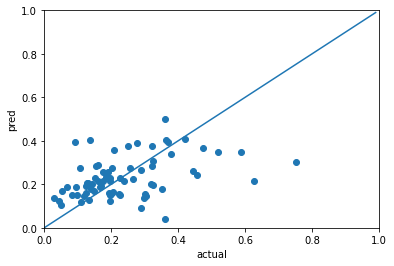

In [368]:
plt.xlim([0,1])
plt.ylim([0,1])
xx=np.arange(0,1,0.01)
yy=xx

plt.scatter(np.concatenate(test),np.concatenate(pred))
plt.plot(xx,yy)
plt.xlabel('actual')
plt.ylabel('pred')